# Deep Reinforcement Learning - Navigation





# Overview

The goal of this project is to train an agent to achieve an average reward of atleast +13 over 100 consecutive episodes in the provided environment.

The environment provided is that of a Unity ML Agents scenario.

A reward of +1 is provided for collecting a yellow banana, and a reward of -1 is provided for collecting a blue banana. Thus, the goal of your agent is to collect as many yellow bananas as possible while avoiding blue bananas.

The state space has 37 dimensions and contains the agent's velocity, along with ray-based perception of objects around the agent's forward direction. Given this information, the agent has to learn how to best select actions. Four discrete actions are available, corresponding to:

* 0 - move forward.
* 1 - move backward.
* 2 - turn left.
* 3 - turn right.


# Implementation

The project was solved using Deep Reinforcement Learning using a Deep Q-Network.

The base code of the project is derived from the solution provided in Udacity Deep Learning Nanodegree Github repo for solving the lunar lander scenario from OpenAI Gym.

https://github.com/udacity/deep-reinforcement-learning/tree/master/dqn

The same solution was modified and updated for the Unity ML Agents environment provided.

* The notebook **Navigation.ipynb** contains the implementation for training and visualising the untrained agent initially. Then the training code is implemented and at the end we can visualize the Trained agent working on the provided environment.

* **dqn_agent.py** contains the code to understand and determine how the agent interacts with the environment and learns to optimize the reward.

* **model.py** contains the architecture of the deep learning model used in this implementation.


# Learning Algorithm

The Deep Q-Learning algorithm(DQN) was chosen to solve the agent-environment interaction.

Q-Learning is one form of TD(Temporal Difference) Learning which enables us to update the Q-table at every timestep. In Deep Q-Learning, a neural network is used as a function approximator to map the relationship between the states and actions and returns the respective Q-Values for every state-action pair.

### Experience Replay and Fixed Q-Targets
Using the general DQN Algorithm the experiences are stored in the form of (State,Action,Values,Next_State) tuples. But this can cause a lot of correlation between the sequences if the agent learns while interacting.

To get rid of this issue, we separate the training and interaction loops into two different networks called the target and local network. This is using Fixed Q-Targets.

The local network interacts with the environment and stores its experiences in a buffer.
At every predefined set of intervals, the target network gets a random sample of predefined size from the buffer and learns from it. This implementation is called Experience Replay.

The local network can then determine in a Supervised Learning fashion by comparing its outputs with that of the target network and compute the loss, hence "learning" better.

### Sync the local and target network
Once the local network learns form the replay buffer, the model parameters of the target network are updated with that of the local network with respect to the relationship below

θ_target = τ*θ_local + (1 - τ)*θ_target

### Model Architecture
The Deep Learning Model used here is a Multilayer Perceptron which returns the Q-values for every state-action value pair. It is defined in the file model.py

* The model has 2 fully connected layers with 64 nodes.
* It takes in an input equal to the state size provided which in this case is 37
* Relu activation function is used betweeen the two layers
* Adam optimizer and Mean-Squared Error loss is used by the neural network to "learn"

### Agent

The agent is defined in the agent.py file. It is the Deep Q-Learning agent which interacts with the environment. It references the local and target network from the model defined in model.py.

It contains four methods:

**Step**: Here the agent saves the experiences in the replay memory. After a certain set of predefined intervals, it also causes the network to learn from the replay buffer.

**Act**: Here the agent returns the actions based on the current policy using Epsilon-Greedy Action Selection

**Learn**: This is where the agent actually learns. We randomly sample a batch from the experience buffer in the form of (states, actions, rewards, next_states, dones) and pass on the next state to the current target network and from there we compute the current Q-Values for the current states.
Then using the same states, we obtain the expected Q-values for the local network.
Comparing these two sets of Q-Values we obtain the losses and update the local network parameters in a Supervised Learning fashion.

Then we run the soft_update function to update the target network with the local network parameters

**Soft_update**: Here we update the target network with the local network parameters using the formula
                    
                    θ_target = τ*θ_local + (1 - τ)*θ_target

### Hyperparameters

The hyperparameters used to train the agent are:


* BUFFER_SIZE = int(1e5)  # replay buffer size
* BATCH_SIZE = 128         # minibatch size
* GAMMA = 0.99            # discount factor
* TAU = 1e-3              # for soft update of target parameters
* LR = 5e-4               # learning rate 
* UPDATE_EVERY = 4        # how often to update the network

# Plot of Rewards

The plot of average rewards for every 100 episodes are listed below.

* Episode 100	Average Score: 0.75
* Episode 200	Average Score: 3.84
* Episode 300	Average Score: 7.69
* Episode 400	Average Score: 9.98
* Episode 470	Average Score: 13.00

Environment solved in 470 episodes!	Average Score: 13.00

![Image](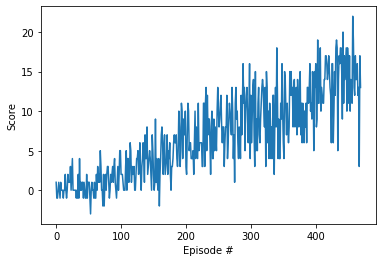%0A)

## Ideas for Future Work

The Reinforcement Learning agent was trained using Deep Q network using Experience Replay and Fixed Q targets

* Using the existing methodology, the hyperparameters can definitely be tuned to get a faster response and higher rewards.
* Other methodologies can include using [Double DQN](https://arxiv.org/abs/1509.06461), [Prioritized Experience Replay](https://arxiv.org/abs/1511.05952) or using [Duelling DQN](https://arxiv.org/abs/1511.06581)
* There are many more modifications to the DQN Algorithm, many of which are incorporated in the [Rainbow DQN](https://arxiv.org/abs/1710.02298) implementation which includes a total of 6 modifications to the traditional DQN algorithm